# Simulator runner

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
from utilitysim import InferenceJob, TrainingJob, get_optimus_fn, get_tanh_fn, get_linear_fn, get_tanh_fn, simulator

In [5]:
a_conv_time = 10
b_conv_time = 20
target_start_accuracy = 50
a_func, a_inv_func = get_optimus_fn(a_conv_time)
b_func, b_inv_func = get_optimus_fn(b_conv_time)
init_time_a = a_inv_func(target_start_accuracy)
init_time_b = b_inv_func(target_start_accuracy)

A_inference = InferenceJob("A_Inference", target_start_accuracy, get_tanh_fn(2)[0], resource_alloc=0)
B_inference = InferenceJob("B_Inference", target_start_accuracy, get_tanh_fn(2)[0], resource_alloc=0)
A_train = TrainingJob("A_Train", a_func, init_time_a, a_conv_time, resource_alloc=0, inference_job=A_inference)
B_train = TrainingJob("B_Train", b_func, init_time_b, b_conv_time, resource_alloc=0, inference_job=B_inference)

training_jobs = [A_train, B_train]
inference_jobs = [A_inference, B_inference]

In [6]:
sim = simulator(training_jobs, inference_jobs, 1, retraining_period=200)
results = sim.step_till_completion()

Period allocation: {0: {'A_Train': 0.25, 'B_Train': 0.25, 'A_Inference': 0.25, 'B_Inference': 0.25}, 36.0: {'A_Train': 0, 'B_Train': 0.3333333333333333, 'A_Inference': 0.3333333333333333, 'B_Inference': 0.3333333333333333}, 63.0: {'A_Train': 0, 'B_Train': 0, 'A_Inference': 0.5, 'B_Inference': 0.5}}
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
Job A_Train is done.
36
Job A_Train is done.
37
Job A_Train is done.
38
Job A_Train is done.
39
Job A_Train is done.
40
Job A_Train is done.
41
Job A_Train is done.
42
Job A_Train is done.
43
Job A_Train is done.
44
Job A_Train is done.
45
Job A_Train is done.
46
Job A_Train is done.
47
Job A_Train is done.
48
Job A_Train is done.
49
Job A_Train is done.
50
Job A_Train is done.
51
Job A_Train is done.
52
Job A_Train is done.
53
Job A_Train is done.
54
Job A_Train is done.
55
Job A_Train is done.
56
Job A_Train is done.
57
Job A_Train is done.
58
Job A_Train is done.
59
Job A_Train is done.
60
Job 

In [7]:
results['meta']

{'inf_mean_auc': 35.445068942651545}

# Visualization

### Accuracy progression

Text(0, 0.5, 'Accuracy')

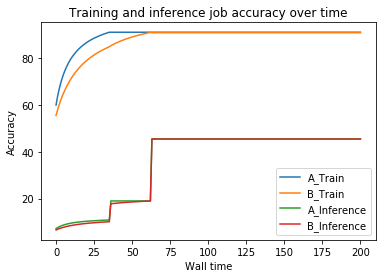

In [8]:
plt.figure()
for job, result in results.items():
    if job != 'meta':
        t, acc = list(zip(*result))
        plt.plot(t, acc, label=job.name)
plt.title("Training and inference job accuracy over time")
plt.legend()
plt.xlabel("Wall time")
plt.ylabel("Accuracy")

In [ ]:
for t, allocation in sim.period_allocation.items():
    names = []
    allocs = []
    for j, alloc in allocation.items():
        allocs.append(alloc)
        names.append(j.name)
    print(names, allocs)
    plt.figure()
    plt.pie(allocs, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title("Allocation at t = {}".format(t))

In [ ]:
means = []
for j, result in results.items():
    if isinstance(j, InferenceJob):
        mean_accuracy = sum(r[1] for r in result)/len(result)
        means.append(mean_accuracy)
MEAN_AUC = sum(means)/len(means)
print("Mean Inference Accuracy across all jobs: {}".format(MEAN_AUC))

In [ ]:
results['meta']